# 主成分分析 (PCA) と線形判別分析 (LDA)
PCAももLDAも、高次元のデータを低次元に射影する方法です。3次元より低次元に射影すれば、高次元のデータの分布の様子を目で見ることが出来ます。
* PCAは、射影後のデータの分散が最大になるように射影先を定めます。
* LDAは、クラス間の分布が分離するように射影先を定めます。

ここでは手書きの数字の画像を題材ににPCAとLDAを試します。画像のサイズは28×28です。画像はピクセルごとの明るさを表す数値の集まりなので、この数字の画像は1つずつが28×28=784個の数値が並んだデータです。画像が$N$枚あれば、あれば、784次元空間中にに$N$点が分布することになりますが、我々には高次元の分布は目で見ることやイメージすることが出来ません。PCAととLDAを使って**可視化**します。



# 主成分分析
手書き数字数字の画像を読み込みます。MNISTと呼ばれるデータ集合をダウンロードします。

In [74]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Load MNIST
mnist = tf.keras.datasets.mnist.load_data()
train, test = mnist
(x_train, y_train),(x_test, y_test) = mnist

MNISTのデータを全部扱うと大変なので、「注目する数字」を定めて、DNUM=1024個だけ読み込みます。

In [36]:
#注目する数字 2種類
TARGET_0 = 1 # Input HERE

# TARGET_0
X0_all = x_train[y_train == TARGET_0, :, :]
X0 = X0_all[0:DNUM,:,:].reshape(DNUM,28*28)
X0 = X0 /255.0

どのような画像データが含まれているのか、確認します。

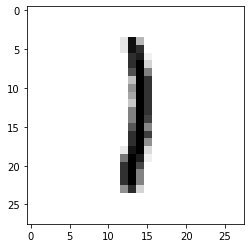

In [37]:
# See an image example
# 下記の ** の部分にに 0 〜 DNUM-1までの数値を書き込んでください。
plt.imshow(X0[10].reshape(28,28), cmap=plt.cm.gray_r)

「注目する数字」の画像DNUM(1024)個は、28×28=784次元でどのように分布しているでしょうか。しているでしょうか。直接見ることは出来ないので、3次元に射影して見てみましょう。3次元の空間はPCAを使って使って「出来るだけ射影後のデータが散らばるように」求めます。

In [62]:
# PCAの計算
from sklearn.decomposition import PCA
# Dimensinarity of the Linear Space
D = 10
# Apply PCA
pca = PCA(n_components=D)
pca.fit(X0)
Xd = pca.transform(X0)

3次元に射影したDNUM=1024個のデータを見てみましょう。3次元空間中のデータの分布なら目で見ることができます。「曲がって分布」していることに気付きます。色々な方向から眺めてみましょう。注目する数字(TARGET_0)を変更して、文字種ごとに分布の形が違うことを見るのも良いでしょう。

In [63]:
import plotly.express as px
fig = px.scatter_3d(x=Xd[:,0], y=Xd[:,1], z=Xd[:,2], size_max = 3, opacity=0.5)
fig.show()

固有値を大きい順に10個表示します。固有値は、対応する固有ベクトルに射影したあとの点の分布の分散を表します。文字画像は、文字ごとに、784次元空間の10次元程度の「薄い」空間内に分布していることが分かります。

<BarContainer object of 10 artists>

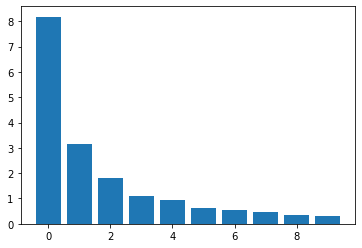

In [69]:
plt.bar( range(D), pca.explained_variance_)

平均や固有ベクトルも784=28x28次元のベクトルですから、画像で表示できます。見てみましょう。まずは平均画像です。全部を足しててDNUMで割った画像です。ボケています。

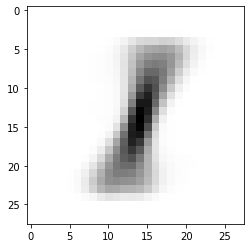

In [40]:
# Plot the mean image
plt.imshow((pca.mean_).reshape(28,28), cmap=plt.cm.gray_r)

次に第一主成分（一番大きな固有値に対応する固有ベクトルを見ましょう）文字の多様性を生み出す最も大きな要因を線形に捉えた画像です。白はプラス、黒はマイナスの値を表します。

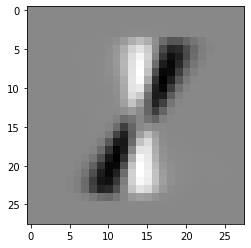

In [43]:
# Plot the first principal component
plt.imshow((pca.components_[0]).reshape(28,28), cmap=plt.cm.gray_r)

平均に第一固有ベクトルを足してみましょう。ボケていた画像がクリアになり、文字が変形します。
平均を$\bar{x}$、$i$番目の固有ベクトルを$\vec{v}_i$で表して、いまから次式で表す画像を表示します。$a_1$や$a_2$を変化させると、平均を原点とする2次元空間中を移動できます。

$x_{new} = \bar{x} + a_1 \vec{v}_1 + a_2 \vec{v}_2$

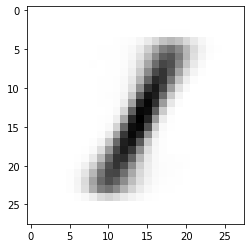

In [70]:
# See images on the plain spanned by the eigen vectors
a0 = 2.0 # Input HERE
a1 = 0.0 # Input HERE
plt.imshow((pca.mean_+a0*pca.components_[0]+a1*pca.components_[1]).reshape(28,28), cmap=plt.cm.gray_r)

次に、異なる文字の画像群が、どのように分布しているのかを観察します。2種類の文字種を指定してください。それら二つのデータを併せたデータを、クラスの別を考慮することなくPCAを適用します。します。

PCAは教師信号（この例では文字種を表すラベル）を用いない「**教師なし学習**」の一種です。

In [72]:
#注目する数字 2種類
TARGET_0 = 1 # Input HERE
TARGET_1 = 8 # Input HERE

# TARGET_0
X0_all = x_train[y_train == TARGET_0, :, :]
X0 = X0_all[0:DNUM,:,:].reshape(DNUM,28*28)
X0 = X0 /255.0

# TARGET_1
X1_all = x_train[y_train == TARGET_1, :, :]
X1 = X1_all[0:DNUM,:,:].reshape(DNUM,28*28)
X1 = X1 /255.0

# Concatenate TARGET_0 and TARGET_1
X = np.concatenate( (X0, X1 ), axis=0)

# Apply PCA to the concatenated data.
D = 3
pca = PCA(n_components=D)
pca.fit(X)
Xd = pca.transform(X)

# Concatenate the laberl data
label0 = np.array([[TARGET_0]]* DNUM)
label1 = np.array([[TARGET_1]]* DNUM)
label = np.concatenate((label0, label1), axis=0)
Xd = np.concatenate((Xd, label), axis = 1 )

では、3次元空間に2種類の文字画像群がどのように分布しているか見てみましょう。意外と離れて分布しているように見えます。ただし、それぞれの文字が異なる「形」に分布していて、境界線は非線形になりそうなことが分かります。

In [73]:
fig = px.scatter_3d(x=Xd[:,0], y=Xd[:,1], z=Xd[:,2], size_max = 3, opacity=0.5, color=Xd[:,3])
fig.show()

# 線形判別分析分析
主成分分析はデータが出来るだけ「散らばる」ような射影先を求める教師なし学習法でした。線形判別分析は出来るだけ「クラスが分離する」ような射影先を求める教師あり学習法です。

In [ ]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

PCAの最後に読み込んだ二つの文字種を出来るだけ分離して表示する1次元ベクトルを線形判別分析で求めます。得られたベクトルを$\vec{a}$で表すと、データ点$\vec{x_i}$は次式のスカラ値に射影されます：

$ u_i = \vec{a}^\top \vec{x}_i$

$u_i$の値の分布を見ると、PCAのときよりも２クラスが分離していることが分かります。

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



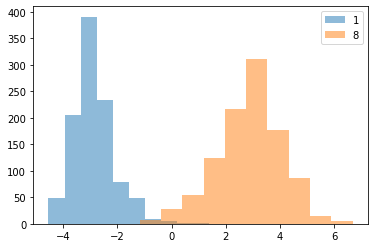

In [77]:
# define model
lda = LDA( n_components = 1 )
results = lda.fit( X, label )
transformed = lda.fit_transform( X, label )

# Plot the projected data distributions
import matplotlib.pyplot as plt

Data = transformed.reshape(-1)
Label = label.reshape(-1)
plt.hist(Data[Label==TARGET_0], label='{}'.format(TARGET_0), alpha=0.5)
plt.hist(Data[Label==TARGET_1], label='{}'.format(TARGET_1), alpha=0.5)

plt.legend(loc='upper right')

ここまでで演習を終えます。

以下はオプションです。判別分析で得られたベクトルをまずは可視化します。あまり面白い画像になりません。

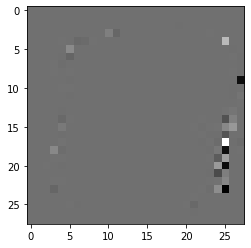

In [79]:
plt.imshow((results.coef_).reshape(28,28),cmap=plt.cm.gray_r)

主成分分析で得られた２次元に射影すると２クラスの分離度は低いことを再確認できます。

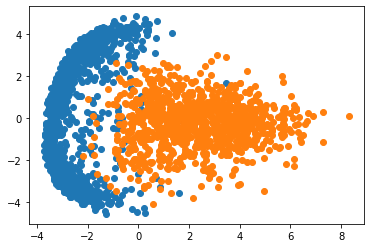

In [78]:
plt.scatter( Xd[0:1024,0], Xd[0:1024,1] )
plt.scatter( Xd[1024:2048, 0], Xd[1024:2048,1] )